# Predicting Math Functions - Part 1
- y = mx+c
- y = x^2
- sin(x)
- Cos(x)



## Important Links
- Mathematics of deep learning
  - https://towardsdatascience.com/deep-learnings-mathematics-f52b3c4d2576
- Machine learning simple math fucntions
  - https://towardsdatascience.com/can-machine-learning-model-simple-math-functions-d336cf3e2a78

### Pytorch links
- https://pytorch.org/tutorials/beginner/ptcheat.html

### interactive widget in jupyter
- https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

- [NN learn sine function](https://stackoverflow.com/questions/46995209/neural-network-toy-model-to-fit-sine-function-fails-whats-wrong)



# This Notebook has a Walkthrough
## Click the below link to watch the video

# [Predicting Functions](http://https://youtu.be/Ypp86VxRy8k)

### If you found the content useful. Kindly give your feedback and consider giving a Thumbs up

In [1]:
# imports
import torch
import torch.nn as nn
from torch.autograd import Variable

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch.nn.functional as F
print("Cuda available :",torch.cuda.is_available())
print("PyTorch Version: ",torch.__version__)

Cuda available : True
PyTorch Version:  1.7.0


In [2]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
print(f"device is set to {device}")

device is set to cuda


In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
# interact with any fucntion usign paramenters

In [4]:
@interact
def drawGraph(start = -10,end=10,num = 100):
  line = np.linspace(start,end,num,dtype=np.float32)
  plt.plot(line,np.sin(line),label='sin')
  plt.plot(line,np.cos(line),label='cos')
  plt.legend()
  plt.show()

interactive(children=(IntSlider(value=-10, description='start', max=10, min=-30), IntSlider(value=10, descript…

In [5]:
# you can get the fucniton usage in ipynb
nn.Linear??

In [19]:
model = nn.Sequential(nn.Linear(1,1),
#                       nn.ReLU()
                     )

learningRate = 2
criterion = nn.MSELoss() 

optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
# SGD and Adam

model.to(device)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [20]:
# user defined funtions
W,B = 50,-200

def linearFunction(ar):
    return W*ar+B

# x_train = np.random.random(size=(100,1)).astype(np.float32)
x_train = np.random.randint(-10,10,size=(100,1)).astype(np.float32)
y_train = linearFunction(x_train)
# print(x_train[0],y_train[0])

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

# Normal Learning

In [21]:
# initialize and train model
start =0
epochs = start + 100
epoch_interval = 10
for epoch in range(start,epochs+1):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    # plot to tensorboard
    
    
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if epoch%epoch_interval == 0:
        writer.add_scalars('weight',{'model_weight':model[0].weight.data[0],'actual_weight':W},epoch)
        writer.add_scalars('bias',{'model_bias':model[0].bias.data[0],'actual_bias':B},epoch)
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 123025.0390625
epoch 10, loss inf
epoch 20, loss nan
epoch 30, loss nan
epoch 40, loss nan
epoch 50, loss nan
epoch 60, loss nan
epoch 70, loss nan
epoch 80, loss nan
epoch 90, loss nan
epoch 100, loss nan


# live visualization

In [10]:
# animation import

import matplotlib.animation as animation
from IPython.display import HTML


from matplotlib import rc
rc('animation', html='jshtml')
# from IPython.display import HTML
%matplotlib inline


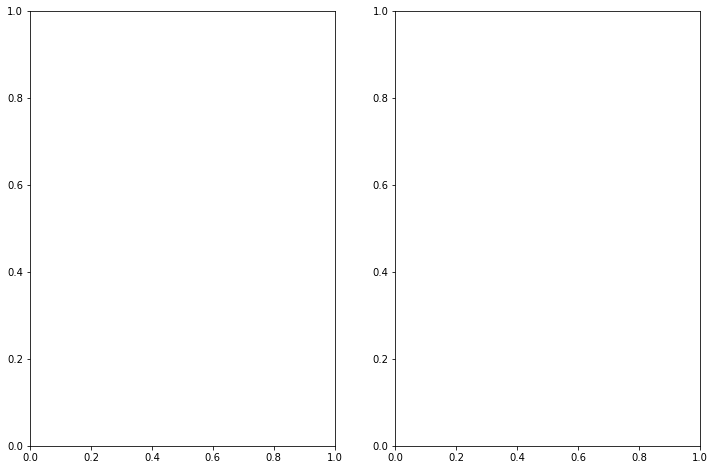

In [15]:
fig,ax = plt.subplots(1,2,figsize=(12,8))


start = -10
end=10
num = 100
loss_arr = []

def model_train_vis(w):
    ax[0].clear()
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # plot to tensorboard


    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    loss_arr.append(loss.item())
    
    line = torch.from_numpy(np.linspace(start,end,num,dtype=np.float32)).to(device)
    preds = model(line.reshape(-1,1) ).detach()
    
    # plot graph
    ax[0].plot(line.cpu().numpy(),preds.cpu().numpy(),
           linewidth=3,label='model')
    ax[0].plot(line.cpu().numpy(),linearFunction(line.cpu().numpy()),label='ground truth')
    ax[0].set_title("Visualize")
    # plot loss
    ax[1].plot(np.linspace(1,len(loss_arr),len(loss_arr)) ,loss_arr,'r+')
    ax[1].set_title("Loss")
    ax[0].legend()
    


In [16]:

# plotting the animation
anim = animation.FuncAnimation(fig, model_train_vis, frames=100, blit=False)
anim # generate a video file 

In [18]:
model[0].weight.data[0]



tensor([50.4469], device='cuda:0')

## Tensorboard in Kaggle

https://www.kaggle.com/shivam1600/tensorboard-on-kaggle

https://pytorch.org/docs/stable/tensorboard.html (pytorch tensorboard)

* > # Setting up Tensorboard

In [33]:
# using the hard way 
# run tensorboard in kaggle server. and operate using public url

# download the files for ngrok
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip

# Run tensorboard as well as Ngrox (for tunneling as non-blocking processes)
import os
import multiprocessing


pool = multiprocessing.Pool(processes = 10)
results_of_processes = [pool.apply_async(os.system, args=(cmd, ), callback = None )
                        for cmd in [
                        f"tensorboard --logdir ./runs/ --host 0.0.0.0 --port 6006 &",
                        "./ngrok http 6006 &"
                        ]]


In [34]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://8628a2623e42.ngrok.io


In [30]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()
# adding graph
a = torch.Tensor([[1],[4],[32]]).cuda()
writer.add_graph(model,a)
# argument is the model and the inpur params
writer.close()

! rm -r runs
! mkdir runs


In [36]:
r = 2
for i in range(100,500):
    writer.add_scalars('run_14h', {'xsinx':i*np.sin(i/r),
                                    'xcosx':i*np.cos(i/r),
                                    'tanx': np.tan(i/r)}, i)
writer.close()

In [37]:
# writer = SummaryWriter()
x = range(100)
for i in x:
    writer.add_scalar('loss new',np.random.randint(1,100),i)
# writer.close()